In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('D:/Skills/Machine_Learning_Maths/Datasets/Bank/Bank Customer Churn Prediction.csv')

In [8]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

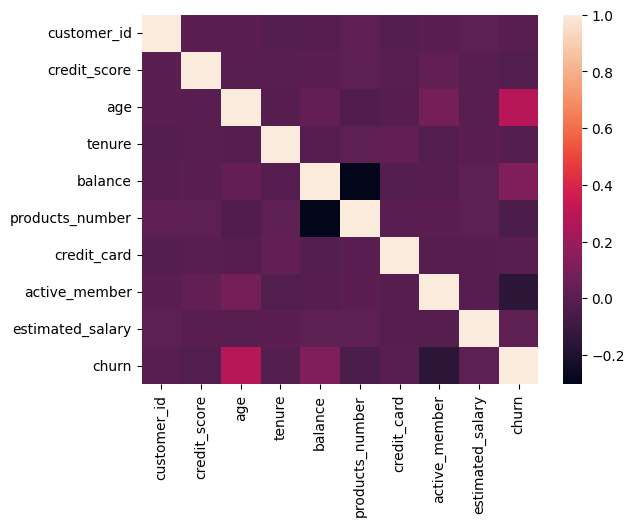

In [10]:
cors = data.corr(numeric_only = True)
sns.heatmap(cors)

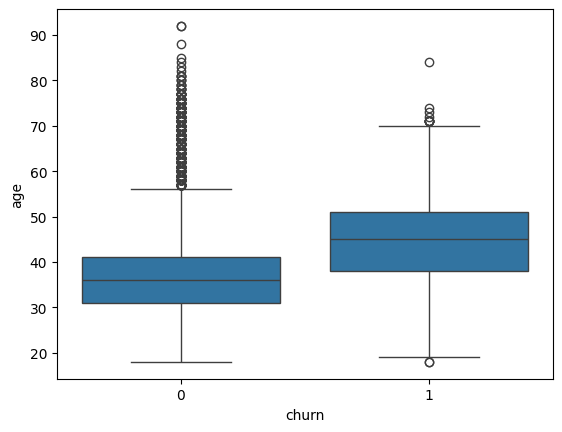

In [11]:
sns.boxplot(x = 'churn', y = 'age', data = data)
plt.show()

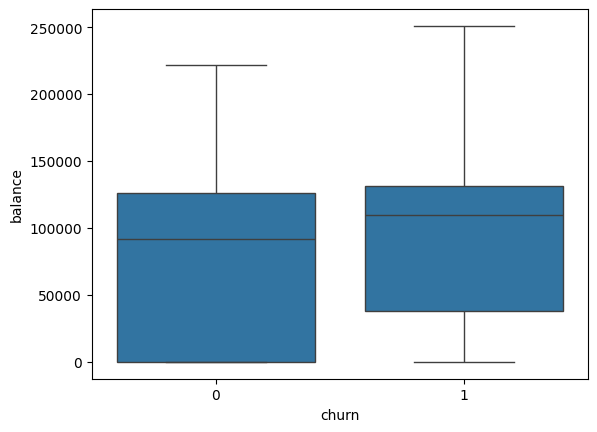

In [12]:
sns.boxplot(x = 'churn', y = 'balance', data = data)
plt.show()

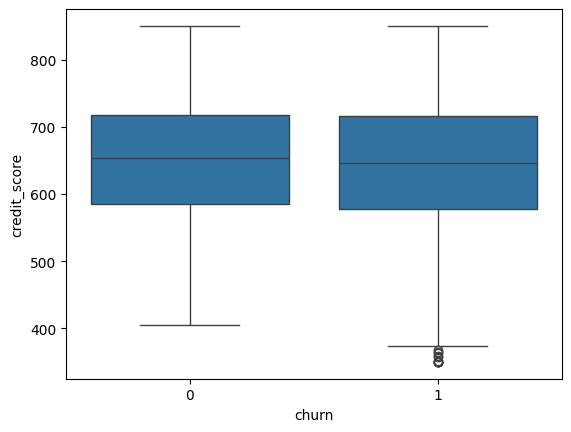

In [13]:
sns.boxplot(x = 'churn', y = 'credit_score', data = data)
plt.show()

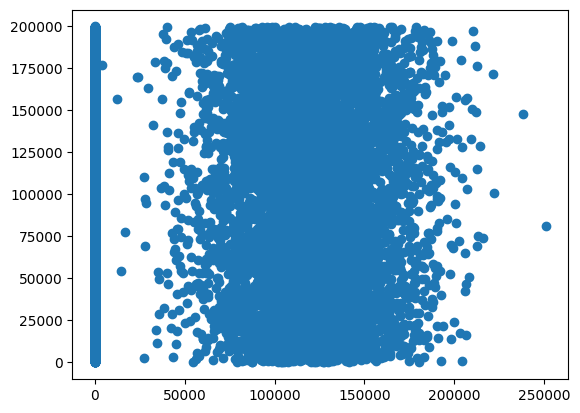

In [14]:
plt.scatter(data['balance'], data['estimated_salary'])

In [15]:
data['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['encoded'] = encoder.fit_transform(data['gender'])
data[['churn', 'encoded']].head()

,churn,encoded
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [21]:
data['encoded'].value_counts()

encoded
1    5457
0    4543
Name: count, dtype: int64

In [22]:
m_values = 5457
f_values = 4543
m_churn, f_churn = 0, 0

for i in range(0, len(data)):
    if(data['churn'][i] == 1 and data['encoded'][i] ==1):
        m_churn += 1
    elif(data['churn'][i] == 1 and data['encoded'][i] == 0):
        f_churn += 1

In [23]:
x = [m_churn, f_churn]
print(x)

[898, 1139]


<BarContainer object of 2 artists>

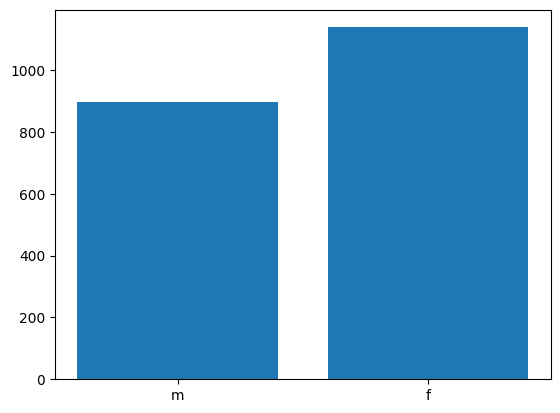

In [24]:
plt.bar(['m', 'f'], [m_churn, f_churn])

In [28]:
print(list(data.columns))

['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn', 'encoded']


In [29]:
y = data['churn']
x = data[['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'encoded']]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.765

In [34]:
model.coef_

array([[-2.64826588e-07, -5.72699405e-04,  6.42220777e-02,
        -5.45968066e-04,  4.81987420e-06, -1.48664382e-04,
        -2.65576329e-05, -1.70176552e-03,  1.23274065e-06,
        -1.19601939e-03]])

In [35]:
from sklearn.pipeline import make_pipeline
test_score = []

for lam in np.arange(0.01, 100, 0.1):
    pipe = make_pipeline(StandardScaler(), LogisticRegression(C = 1/lam))
    pipe.fit(x_train, y_train)
    scores = pipe.score(x_test, y_test)
    test_score.append(scores)

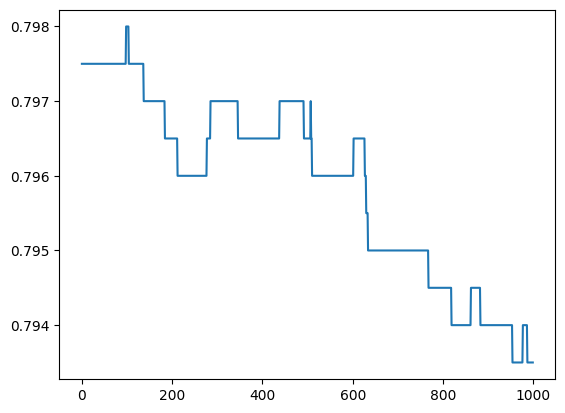

In [36]:
plt.plot(test_score)

In [37]:
np.argmax(test_score)

np.int64(98)

In [40]:
l_best = 0.01 * 98 * 0.1
print(l_best)

0.098
